In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [2]:
df=pd.read_csv('Final_data.csv')

In [3]:
df.head()

,Unnamed: 0,ownerNo,modelYear,price,Kms Driven,Mileage,Engine,seat,Fuel_type_Cng,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Lpg,Fuel_type_Petrol,Body_type_Convertibles,Body_type_Coupe,Body_type_Hatchback,Body_type_MUV,Body_type_Minivan,Body_type_Minivans,Body_type_Pickup Trucks,Body_type_SUV,Body_type_Sedan,Body_type_Wagon,transmission_Automatic,transmission_Manual,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Datsun,brand_Fiat,brand_Ford,brand_Hindustan Motors,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land Rover,...,Color_Silky silver,Color_Silver,Color_Sleek Silver,Color_Smoke Grey,Color_Solid Fire Red,Color_Star Dust,Color_StarDust,Color_Starry Black,Color_Sunset Red,Color_Super white,Color_Superior white,Color_Symphony Silver,Color_T Wine,Color_TAFETA WHITE,Color_TITANIUM,Color_TITANIUM GREY,Color_Tafeta White,Color_Taffeta White,Color_Twilight Blue,Color_Urban Titanium Metallic,Color_Violet,Color_White,Color_Wine Red,Color_Yellow,Color_a silver,Color_b grey,Color_b red,Color_c brown,Color_chill,Color_g brown,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,city_Banglore,city_Chennai,city_Delhi,city_Hydrabad,city_Jaipur,city_Kolkata
0,0,2.539936,-0.371059,4.00,1.365719,0.899259,-0.879360,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.984784,0.427790,8.11,-0.610531,-0.681753,0.372187,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,-0.570369,0.427790,5.85,-1.080448,1.091054,-0.375230,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,-0.570369,-0.637342,4.62,-0.948123,-0.137470,-0.380246,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,-0.570369,-0.371059,7.90,0.007378,1.041809,-0.252332,-0.283046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,ownerNo,modelYear,price,Kms Driven,Mileage,Engine,seat,Fuel_type_Cng,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Lpg,Fuel_type_Petrol,Body_type_Convertibles,Body_type_Coupe,Body_type_Hatchback,Body_type_MUV,Body_type_Minivan,Body_type_Minivans,Body_type_Pickup Trucks,Body_type_SUV,Body_type_Sedan,Body_type_Wagon,transmission_Automatic,transmission_Manual,brand_Audi,brand_BMW,brand_Chevrolet,brand_Citroen,brand_Datsun,brand_Fiat,brand_Ford,brand_Hindustan Motors,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land Rover,brand_MG,...,Color_Silky silver,Color_Silver,Color_Sleek Silver,Color_Smoke Grey,Color_Solid Fire Red,Color_Star Dust,Color_StarDust,Color_Starry Black,Color_Sunset Red,Color_Super white,Color_Superior white,Color_Symphony Silver,Color_T Wine,Color_TAFETA WHITE,Color_TITANIUM,Color_TITANIUM GREY,Color_Tafeta White,Color_Taffeta White,Color_Twilight Blue,Color_Urban Titanium Metallic,Color_Violet,Color_White,Color_Wine Red,Color_Yellow,Color_a silver,Color_b grey,Color_b red,Color_c brown,Color_chill,Color_g brown,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,city_Banglore,city_Chennai,city_Delhi,city_Hydrabad,city_Jaipur,city_Kolkata
0,2.539936,-0.371059,4.00,1.365719,0.899259,-0.879360,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.984784,0.427790,8.11,-0.610531,-0.681753,0.372187,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.570369,0.427790,5.85,-1.080448,1.091054,-0.375230,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.570369,-0.637342,4.62,-0.948123,-0.137470,-0.380246,-0.283046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.570369,-0.371059,7.90,0.007378,1.041809,-0.252332,-0.283046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
x=df.drop('price',axis=1).values
y=df.price

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
models={'LinearRegression':LinearRegression(),'DecisionTreeRegressor':DecisionTreeRegressor(),'RandomForestRegressor':RandomForestRegressor(),'GradientBoostingRegressor':GradientBoostingRegressor()}
evaluation=[]
for name,model in models.items():
    ml_model=model
    ml_model.fit(x_train,y_train)
    y_prediction=ml_model.predict(x_test)
    evaluation.append({'Model':name,'r2_score':r2_score(y_prediction,y_test),'mean_absolute_error':np.sqrt(mean_absolute_error(y_prediction,y_test)),'mean_squared_error':np.sqrt(mean_squared_error(y_prediction,y_test))})
pd.DataFrame(evaluation)

,Model,r2_score,mean_absolute_error,mean_squared_error
0,LinearRegression,-0.004309,40212.146323,1.522263e+10
1,DecisionTreeRegressor,0.814078,0.988662,1.597613e+00
2,RandomForestRegressor,0.864442,0.867879,1.272635e+00
3,GradientBoostingRegressor,0.791460,0.987148,1.438424e+00


Lasso model

In [9]:
lasso_model=Lasso()
lasso_model.fit(x_train,y_train)
lasso_pred=lasso_model.predict(x_test)
lasso_score=r2_score(lasso_pred,y_test)
print('score :',lasso_score)

score : -5.825507675390495


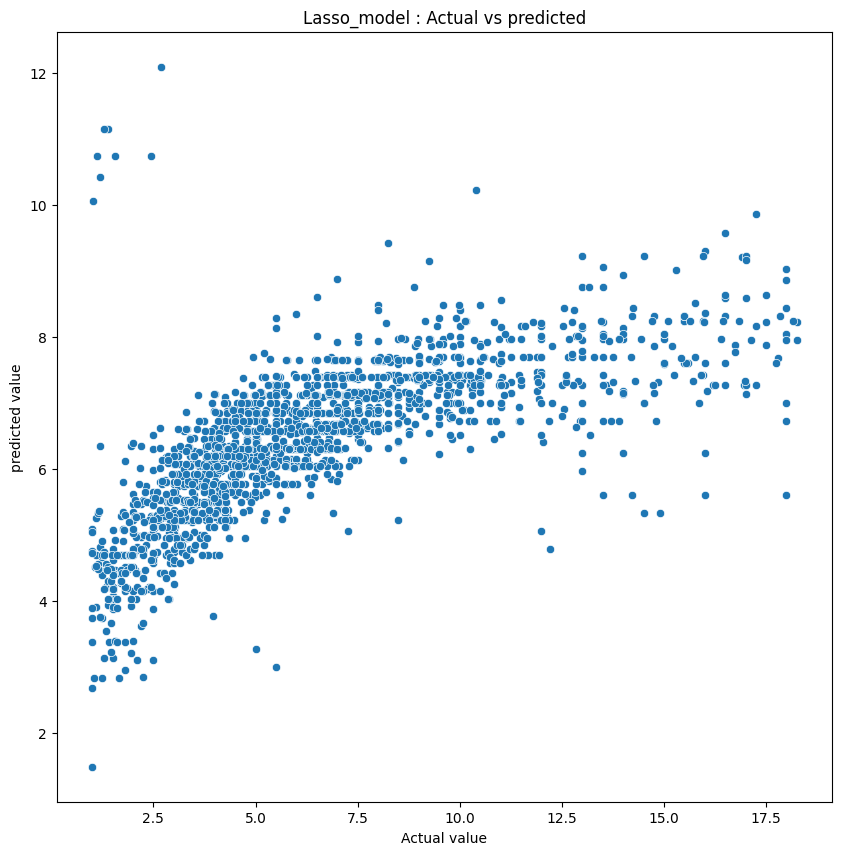

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=lasso_pred)
plt.title('Lasso_model : Actual vs predicted')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

Ridge model

In [11]:
ridge_model=Ridge()
ridge_model.fit(x_train,y_train)
ridge_pred=ridge_model.predict(x_test)
ridge_score=r2_score(ridge_pred,y_test)
print('Score :',ridge_score)

Score : 0.8241311263059066


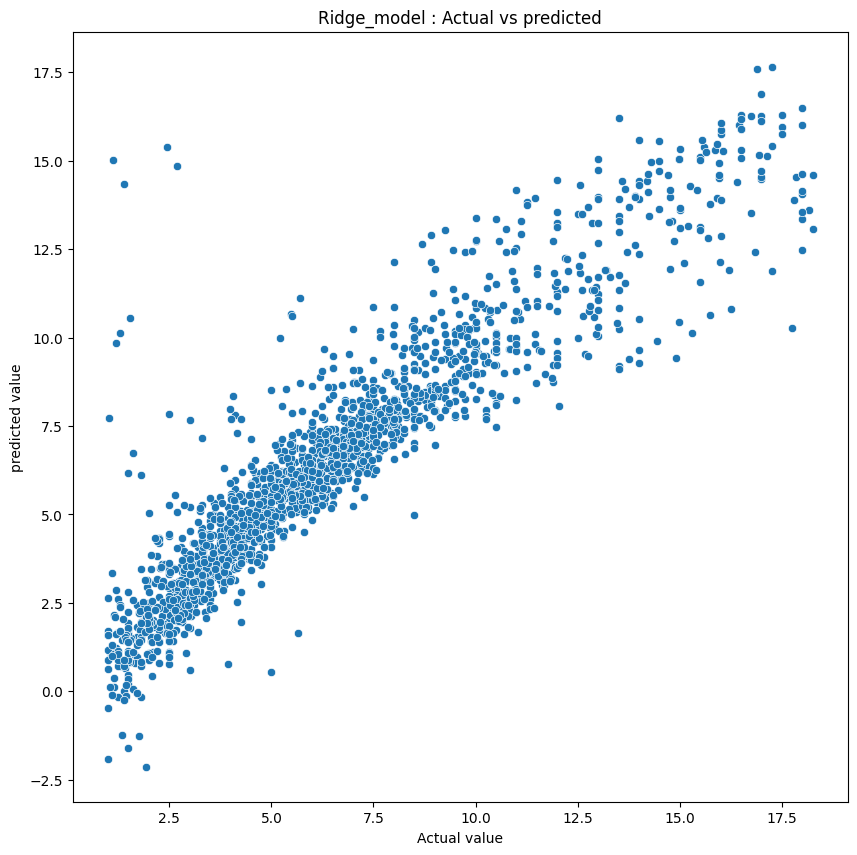

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=ridge_pred)
plt.title('Ridge_model : Actual vs predicted')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()


In [13]:
alpha_value_lasso=[0.0001,0.001,0.01,0.1,1] #lasso model
result_lasso=[]
for i in alpha_value_lasso:
    lasso_model=Lasso(alpha=i)
    lasso_model.fit(x_train,y_train)
    lasso_pred=lasso_model.predict(x_test)
    result_lasso.append({'Value':i,'r2_score':r2_score(lasso_pred,y_test),'mean_absolute_error':np.sqrt(mean_absolute_error(lasso_pred,y_test)),'mean_squared_error':np.sqrt(mean_squared_error(lasso_pred,y_test))})
pd.DataFrame(result_lasso)

C:\Users\ukesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.883e+02, tolerance: 7.521e+00
  model = cd_fast.enet_coordinate_descent(


,Value,r2_score,mean_absolute_error,mean_squared_error
0,0.0001,0.828020,0.951263,1.447198
1,0.0010,0.812797,0.955321,1.469755
2,0.0100,0.654825,1.085094,1.850795
3,0.1000,0.302644,1.225117,2.260049
4,1.0000,-5.825508,1.483363,2.967873


In [14]:
alpha_value_ridge=[0.0001,0.001,0.01,0.1,1]
result_ridge=[]
for i in alpha_value_ridge:
    ridge_model=Ridge(alpha=i)
    ridge_model.fit(x_train,y_train)
    ridge_pred=ridge_model.predict(x_test)
    result_ridge.append({'Value':i,'r2_score':r2_score(ridge_pred,y_test),'mean_absolute_error':np.sqrt(mean_absolute_error(ridge_pred,y_test)),'mean_squared_error':np.sqrt(mean_squared_error(ridge_pred,y_test))})
pd.DataFrame(result_ridge)

,Value,r2_score,mean_absolute_error,mean_squared_error
0,0.0001,0.845108,0.947321,1.375553
1,0.0010,0.844774,0.947387,1.376832
2,0.0100,0.842066,0.947939,1.387832
3,0.1000,0.834926,0.950028,1.416649
4,1.0000,0.824131,0.950820,1.442762


In [15]:
rf_param={
    'n_estimators':[10,20,30,40,50,60,70,80],
    'criterion':['squared_error','friedman_mse','poisson'],
    'max_depth':[None,10,20,30,40,50,60,70,80,90,100],
    'min_samples_leaf':[2,4,6,8,10,12,14,16,18,20],
    'max_features':[None,'sqrt','log2']
}

In [16]:
rf_param_tunning=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=rf_param,cv=5)

In [17]:
rf_param_tunning.fit(x_train,y_train)

C:\Users\ukesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80]})

In [18]:
rf_param_tunning.best_params_,rf_param_tunning.best_score_

({'n_estimators': 80,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 90,
  'criterion': 'poisson'},
 np.float64(0.876719387343568))

In [19]:
final_model=RandomForestRegressor(n_estimators= 50,min_samples_leaf= 2,max_depth= 100,criterion='friedman_mse')
final_model.fit(x_train,y_train)
final_model_pred=final_model.predict(x_test)
final_model_score={'Model':'RandomForestRegressor','r2_score':r2_score(final_model_pred,y_test),'mean_absolute_error':np.sqrt(mean_absolute_error(final_model_pred,y_test)),'mean_squared_error':np.sqrt(mean_squared_error(final_model_pred,y_test))}
pd.DataFrame([final_model_score])

,Model,r2_score,mean_absolute_error,mean_squared_error
0,RandomForestRegressor,0.859402,0.879736,1.297853


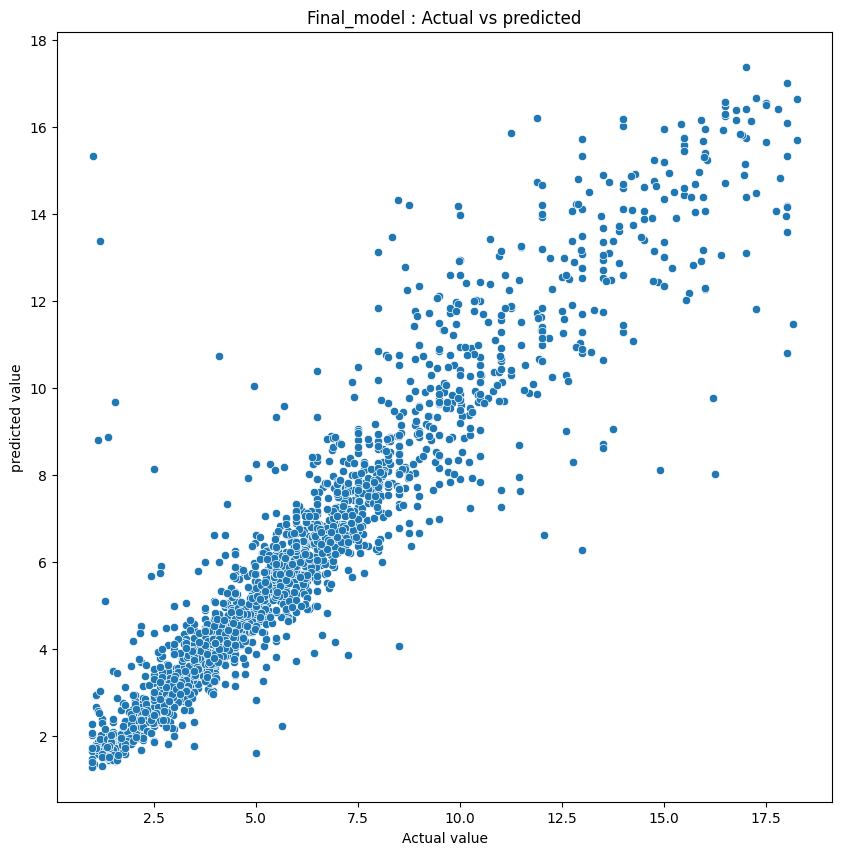

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=final_model_pred)
plt.title('Final_model : Actual vs predicted')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()


In [21]:
with open ('final_model.pkl','wb') as ml_file:
    pickle.dump(final_model,ml_file)

In [ ]:
model_df=pd.read_csv('cleaned_data.csv')

In [59]:
model_df.head()

,Unnamed: 0,Fuel_type,Body_type,transmission,ownerNo,brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,seat,Color,city
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000.0,23.10,998,5,White,Banglore
1,1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706.0,17.00,1497,5,White,Banglore
2,2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949.0,23.84,1199,5,Red,Banglore
3,3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794.0,19.10,1197,5,Others,Banglore
4,4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000.0,23.65,1248,5,Gray,Banglore


In [60]:
model_df.drop('Unnamed: 0',axis=1,inplace=True)

In [61]:
x_data=model_df.drop('price',axis=1)
y_data=model_df.price

In [62]:
x_data

,Fuel_type,Body_type,transmission,ownerNo,brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Engine,seat,Color,city
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,Third Party insurance,120000.0,23.10,998,5,White,Banglore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,Comprehensive,32706.0,17.00,1497,5,White,Banglore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,Comprehensive,11949.0,23.84,1199,5,Red,Banglore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,Comprehensive,17794.0,19.10,1197,5,Others,Banglore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,Third Party insurance,60000.0,23.65,1248,5,Gray,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,Manual,1,Chevrolet,Chevrolet Beat,2011,Third Party insurance,120000.0,18.60,1199,5,Others,Jaipur
8365,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto,2007,Third Party insurance,70000.0,19.70,796,5,Others,Jaipur
8366,Petrol,SUV,Manual,1,Renault,Renault Kiger,2022,Third Party insurance,20000.0,19.17,999,5,Others,Jaipur
8367,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto,2009,Third Party insurance,40000.0,19.70,796,5,Others,Jaipur


In [63]:
y_data

0       4.00
1       8.11
2       5.85
3       4.62
4       7.90
        ... 
8364    1.08
8365    1.05
8366    8.50
8367    1.00
8368    5.00
Name: price, Length: 8369, dtype: float64

In [95]:
x_data_train,x_data_test,y_data_train,y_data_test=train_test_split(x_data,y_data,test_size=0.25,random_state=1)

In [64]:
with open('scaler.pkl','rb') as scale:
    scaler=pickle.load(scale)

In [65]:
with open('OneHotEncoder.pkl','rb') as encode:
    encoder=pickle.load(encode)

In [66]:
with open('final_model.pkl','rb') as mlmodel:
    final_ml_model=pickle.load(mlmodel)

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
number_val=x_data.select_dtypes(include=['int','float']).columns.to_list()
cat_val=x_data.select_dtypes(include=['object']).columns.to_list()

number_val_pre=Pipeline(steps=[('number',scaler)])
cat_val_pre=Pipeline(steps=[('categorical',encoder)])

preprocess=ColumnTransformer(transformers=[('numerical',number_val_pre,number_val),('categorical',cat_val_pre,cat_val)])


In [69]:
from sklearn import set_config
set_config(display='diagram')

In [71]:
preprocess

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('number', StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Engine', 'seat']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Fuel_type', 'Body_type', 'transmission',
                                  'brand', 'model', 'Insurance Validity',
                                  'Color', 'city'])])

In [72]:
final_pipline=Pipeline(steps=[('preprocessing',preprocess),('Ml_model',final_ml_model)])

In [96]:
final_pipline.fit(x_data_train,y_data_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('number',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Engine', 'seat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_type', 'Body_type',
                                                   'transmission', 'brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'city'])])),
                ('Ml_model',
                 RandomForestRegressor(criterion='friedman_mse', max_depth=100,
                                       min_samples_leaf=2, n_estimators=50))])

In [97]:
final_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('number',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Engine', 'seat']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_type', 'Body_type',
                                                   'transmission', 'brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'city'])])),
                ('Ml_model',
                 RandomForestRegressor(criterion='friedman_mse', max_depth=100,
                                       min_samples_leaf=2, n_estimators=50))])

In [98]:
with open('Pipeline.pkl','wb') as model_pipline:
    pickle.dump(final_pipline,model_pipline)

In [99]:
model_df[model_df['brand']=='BMW']

,Fuel_type,Body_type,transmission,ownerNo,brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,seat,Color,city
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,22.00,Third Party insurance,100000.0,18.48,1995,5,White,Banglore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,18157.0,15.56,1998,5,Blue,Banglore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,33.95,Comprehensive,40525.0,21.76,1995,5,White,Banglore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,28.90,Comprehensive,92000.0,16.55,1995,5,White,Banglore
117,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,6.00,Third Party insurance,80000.0,13.20,1995,5,Others,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2014,14.25,Comprehensive,79412.0,19.59,1995,5,Red,Jaipur
7825,Diesel,Sedan,Automatic,3,BMW,BMW 3 Series,2017,17.00,Not Available,69383.0,22.69,1995,5,Mediterranean Blue,Jaipur
7858,Diesel,SUV,Automatic,1,BMW,BMW X5,2014,24.50,Third Party insurance,82882.0,11.70,2993,5,Brown,Jaipur
8052,Diesel,Sedan,Automatic,1,BMW,BMW 5 Series,2012,12.75,Comprehensive,107000.0,16.73,1995,5,White,Jaipur


In [100]:
model_df.loc[72]

Fuel_type                      Diesel
Body_type                       Sedan
transmission                Automatic
ownerNo                             1
brand                             BMW
model                 BMW 3 Series GT
modelYear                        2016
price                           33.95
Insurance Validity      Comprehensive
Kms Driven                    40525.0
Mileage                         21.76
Engine                           1995
seat                                5
Color                           White
city                         Banglore
Name: 72, dtype: object

In [155]:
pre_data=pd.DataFrame({'Fuel_type':['Diesel','Petrol'],
                       'Body_type':['Sedan','Sedan'],
                       'transmission':['Automatic','Manual'],
                       'ownerNo':[1,3],
                       'brand':['BMW','Ford'],
                       'model':['BMW 3 Series GT','Ford Ecosport'],
                       'modelYear':[2016,2018],
                       'Insurance Validity':['Comprehensive','Comprehensive'],
                       'Kms Driven':[40525.0,40000.0],
                       'Mileage':[21.76,21.76],
                       'Engine':[1995,2008],
                       'seat':[5,5],
                       'Color':['White','Others'],
                       'city':['Banglore','Chennai']})

In [179]:
pre_data.iloc[0]

Fuel_type                      Diesel
Body_type                       Sedan
transmission                Automatic
ownerNo                             1
brand                             BMW
model                 BMW 3 Series GT
modelYear                        2016
Insurance Validity      Comprehensive
Kms Driven                    40525.0
Mileage                         21.76
Engine                           1995
seat                                5
Color                           White
city                         Banglore
Name: 0, dtype: object

In [172]:
pre_val=final_pipline.predict(pre_data)

In [173]:
print(f'The predicited value of {pre_data['brand'].iloc[0]} brand car of {pre_data['modelYear'].iloc[0]} model is {np.round(pre_val[0],2)} lakhs')

The predicited value of BMW brand car of 2016 model is 30.04 lakhs


In [12]:
model_df['Kms Driven'].count()

np.int64(8369)

In [17]:
model_df['Kms Driven'].max()

np.float64(5500000.0)

In [16]:
model_df[model_df['Kms Driven']==101.0]

,Unnamed: 0,Fuel_type,Body_type,transmission,ownerNo,brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,seat,Color,city
3072,3072,Petrol,SUV,Automatic,1,Land Rover,Land Rover Defender,2023,1.32,Comprehensive,101.0,9.2,1997,5,White,Delhi


In [28]:
model_df['seat'].unique()

array([ 5,  7,  4,  6,  8, 10,  9,  2])